# 6.1.4 Create Latitude and Longitude Combinations

In [44]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# Add the code that generates the latitudes and longitudes
#     first, they need to be stored for later access
#     declare each array as a variable since an array of latitudes and longitudes is being created.

# To ensure enough lats and longs are created, begin with 1500
# Pack the lats and longs as pairs and zip them (lat_lngs) with the "zip()" function.
    # zip object packs each pair of lats lngs having the same index in their respective array into a tuple
        # Example: if there are 1500 latitudes and longitudes, there will be 1500 tuples of paired latitudes and longitudes
        #      where each latitude and longitude in a tuple can be accessed by the index of 0 and 1 respectively.
        
        # **Can only unzip a zipped tuple once before it is removed from the computer's memory. 
        # **Ensure to unzip the latitudes and longitudes into the coordinates list before moving on.

In [46]:
# Create a set of random latitude and longitude combinations and "zip()" them.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [47]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [48]:
# Once ordered pairs have been created and put into a list(array)
#      iterate through the list of tuples and find the nearest city to the coordinates.

# 6.1.5 Generate Random World Cities

In [49]:
# Match coordinates up with cities
    # With the list of random latitudes and longitudes, use the coordinates in lat_lngs tuple to find the nearest city
    #      using Python's "citipy module".

# Install(using "pip install citipy" from the PythonData Anaconda Prompt), Import and Test "CityPy" module.

In [50]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [51]:
# Create a list for holding the cities[].
# Create a for loop that will do the following:
    # Iterate through the coordinates' zipped tuple.
    # Use citipy.nearest_city() and inside the parentheses of nearest_city(),
    #      add the latitude and longitude in this format: coordinate[0], coordinate[1].
    # To print the city name, chain the city_name to the nearest_city() function.
    # To print the country name, chain the country_code to the nearest_city() function.

In [52]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

## Recap

- Create a cities list to store city names.
- Iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.
- Add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, use the append() function to add it.  
    -This is done because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities; need to be sure only the unique cities are captured.

### NOTE
The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

# FINDING  
When the code block is run, there should be slightly more than 500 unique cities. If there are less than 500, the "size" limit on the "np.random.uniform()" function must be increased.

# 6.2.6 Get the City Weather Data (con't from API_Practice notebook)
## Import Dependencies, and Initialize an Empty List and Counters  
- Import your Requests Library.  
- Import the weather_api_key.  
- Build the basic URL for the OpenWeatherMap with weather_api_key added to the URL.  
- Import the datetime module:  
- Declare an empty list at the top of the code block "city_data = []"  
- Add a print statement that references the beginning of the logging  
- Create counters for the record numbers, 1-50  
    - set the counter  

In [53]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [54]:
# Starting URL for Weather Map API Call.
# original URL structure from weathermap site: api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [55]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [56]:
# The code block is initialized with the counters set at 1 because
#      the first iteration of the logging for each recorded response
#      and the set should start at 1

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Next, iterate through the above coded list of cities and begin building the URL for each city,
#      while grouping our records in sets of 50.

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

# Create another "for" loop(in this case the "enumerate()" method)
#      to prevent the indexing error by iterating through the [cities] list.
# Using the "enumerate()" method prevents the use of two "for" loops.
# It retrieves both the city and the index from the list.

# Loop through all the cities in the list. (Comment out the previous loop above.)
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Code continues here but the explanation is in the next markdown.

# Run an API request for each of the cities using the try-except statement.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city. In the work environment "pass" should not typically be used.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maxixe
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | klaksvik
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | kenora
Processing Record 8 of Set 1 | westport
Processing Record 9 of Set 1 | kabale
Processing Record 10 of Set 1 | antsohihy
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | talara
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | bathsheba
Processing Record 16 of Set 1 | oranjemund
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | salalah
Processing Re

Processing Record 36 of Set 4 | geraldton
Processing Record 37 of Set 4 | saurimo
Processing Record 38 of Set 4 | talcahuano
Processing Record 39 of Set 4 | port blair
Processing Record 40 of Set 4 | oistins
Processing Record 41 of Set 4 | stephenville
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | katsuura
Processing Record 44 of Set 4 | tommot
Processing Record 45 of Set 4 | aksu
Processing Record 46 of Set 4 | omsukchan
Processing Record 47 of Set 4 | bredasdorp
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | cidreira
Processing Record 50 of Set 4 | avarua
Processing Record 1 of Set 5 | jinchang
Processing Record 2 of Set 5 | florence
Processing Record 3 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 5 | yushu
Processing Record 5 of Set 5 | norman wells
Processing Record 6 of Set 5 | santa barbara
Processing Record 7 of Set 5 | mar del plata
Processing Record 8 of Set 5 | ugoofaaru
Processing Recor

Processing Record 29 of Set 8 | udomlya
Processing Record 30 of Set 8 | nabire
Processing Record 31 of Set 8 | kampong chhnang
Processing Record 32 of Set 8 | talnakh
Processing Record 33 of Set 8 | puri
Processing Record 34 of Set 8 | iralaya
Processing Record 35 of Set 8 | cap malheureux
Processing Record 36 of Set 8 | mata
Processing Record 37 of Set 8 | lerik
Processing Record 38 of Set 8 | kamina
Processing Record 39 of Set 8 | half moon bay
Processing Record 40 of Set 8 | alice springs
Processing Record 41 of Set 8 | hanmer springs
Processing Record 42 of Set 8 | lamar
Processing Record 43 of Set 8 | capreol
Processing Record 44 of Set 8 | urucara
Processing Record 45 of Set 8 | vorukh
Processing Record 46 of Set 8 | arandis
Processing Record 47 of Set 8 | sandy bay
Processing Record 48 of Set 8 | monrovia
Processing Record 49 of Set 8 | vostok
Processing Record 50 of Set 8 | ternate
Processing Record 1 of Set 9 | kamwenge
Processing Record 2 of Set 9 | samalaeulu
City not found.

Processing Record 16 of Set 12 | phan rang
City not found. Skipping...
Processing Record 17 of Set 12 | sapai
City not found. Skipping...
Processing Record 18 of Set 12 | lalmohan
Processing Record 19 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 20 of Set 12 | coahuayana
Processing Record 21 of Set 12 | karasburg
Processing Record 22 of Set 12 | atar
Processing Record 23 of Set 12 | ulladulla
Processing Record 24 of Set 12 | kodinsk
Processing Record 25 of Set 12 | kabanjahe
Processing Record 26 of Set 12 | minsk
Processing Record 27 of Set 12 | alofi
Processing Record 28 of Set 12 | kedrovyy
Processing Record 29 of Set 12 | egvekinot
Processing Record 30 of Set 12 | nepalganj
City not found. Skipping...
Processing Record 31 of Set 12 | pudozh
Processing Record 32 of Set 12 | sovetskiy
Processing Record 33 of Set 12 | acapulco
Processing Record 34 of Set 12 | puerto cabezas
Processing Record 35 of Set 12 | sorland
Processing Record 36 of Set 12 | portland
Proces

In [57]:
print(len(city_data))

561


### **NOTE**  
When retrieving data from an API, or even when scraping a webpage, make sure there is data to parse.  
If not, the script might stop at that moment and not finish getting all the data we need.  

## Handle API Request Errors with try-except Blocks  
This prevents the API request from stopping prematurely if the request does not yield a valid response.  
If the request is not valid, the code will not find the first item requested and skip the city and continue to run.  
The syntax for the "try-except" statement is similar to the "if-else" statement.  

After the record_count +=1 code line add the "try" block.  

After adding a "try" block:  
    - Parse the JSON file.  
    - Assign variables for each piece of data needed.  
    - Add the data to the cities list in a dictionary format.  

### **IMPORTANT**
Generally, it isn't good coding practice to add the pass statement to the except block.  
Ideally, should handle or catch each error as it happens and do something specific  
(e.g., add another try block or print out the error).  

# 6.2.7 Create a DataFrame of City Weather Data  
Convert to DataFrame  
Export to csv file

In [58]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maxixe,-23.8597,35.3472,64.04,60,100,8.81,MZ,2021-07-25 02:01:33
1,Ushuaia,-54.8000,-68.3000,35.33,94,100,5.03,AR,2021-07-25 02:01:33
2,Yellowknife,62.4560,-114.3525,58.28,44,55,5.99,CA,2021-07-25 02:01:25
3,Klaksvik,62.2266,-6.5890,50.92,97,54,9.40,FO,2021-07-25 02:01:34
4,Arraial Do Cabo,-22.9661,-42.0278,69.71,76,0,23.20,BR,2021-07-25 02:01:34
5,Atuona,-9.8000,-139.0333,78.39,70,16,17.27,PF,2021-07-25 02:01:34
6,Kenora,49.8167,-94.4337,69.60,48,20,5.23,CA,2021-07-25 02:01:35
7,Westport,41.1415,-73.3579,75.20,82,98,5.99,US,2021-07-25 02:01:03
8,Kabale,-1.2486,29.9899,56.66,63,5,5.14,UG,2021-07-25 02:01:35
9,Antsohihy,-14.8796,47.9875,64.80,70,40,6.91,MG,2021-07-25 02:01:35


In [59]:
# Reorder the DataFrame column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maxixe,MZ,2021-07-25 02:01:33,-23.8597,35.3472,64.04,60,100,8.81
1,Ushuaia,AR,2021-07-25 02:01:33,-54.8000,-68.3000,35.33,94,100,5.03
2,Yellowknife,CA,2021-07-25 02:01:25,62.4560,-114.3525,58.28,44,55,5.99
3,Klaksvik,FO,2021-07-25 02:01:34,62.2266,-6.5890,50.92,97,54,9.40
4,Arraial Do Cabo,BR,2021-07-25 02:01:34,-22.9661,-42.0278,69.71,76,0,23.20
...,...,...,...,...,...,...,...,...,...
556,Charagua,BO,2021-07-25 02:04:01,-19.8000,-63.2167,69.24,53,17,7.14
557,Caucaia,BR,2021-07-25 02:04:01,-3.7361,-38.6531,80.04,76,20,6.91
558,Tura,IN,2021-07-25 02:04:01,25.5198,90.2201,79.00,90,89,6.58
559,Zemio,CF,2021-07-25 02:04:01,5.0314,25.1361,67.01,96,68,2.46


In [62]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature  
Create a series of scatter plots for each weather parameter against the latitude for all cities.  
- create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed  

Summarize how different weather parameters change based on the latitude.  

In [63]:
# Get Data for Plotting  
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

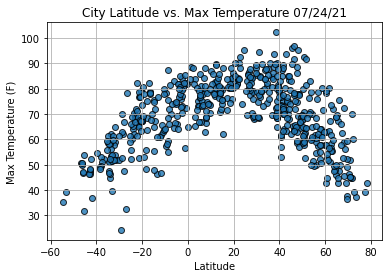

In [64]:
# Add "time.strftime("%x") to "plt.title()" function in the scatter plot.
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity  
Refactor the scatter plot code by changing:  
- the y-axis variable to "humidity",  
- the title to "Humidity (%)", and  
- the y-axis label to "Humidity (%)".  

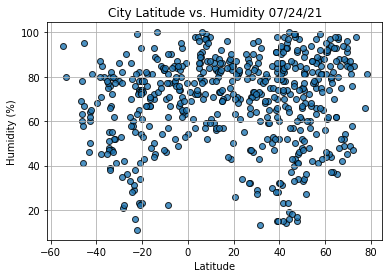

In [67]:
# Change the y-axis variable to "humidity" and the title to "Humidity" and y-axis label to "Humidity(%)".
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness  
Refactor the scatter plot code by changing:  
- the y-axis variable to "cloudiness",  
- the title to "Cloudiness (%)", and  
- the y-axis label to "Cloudiness (%)".  

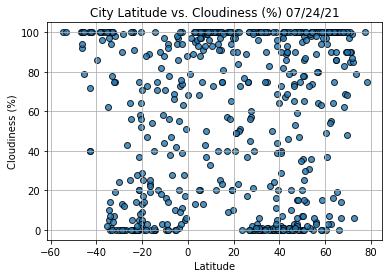

In [68]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed  
Refactor the scatter plot code by changing:
- the y-axis variable to "wind_speed",
- the title to "Wind Speed (%)", and
- the y-axis label to "Wind Speed (mph)".

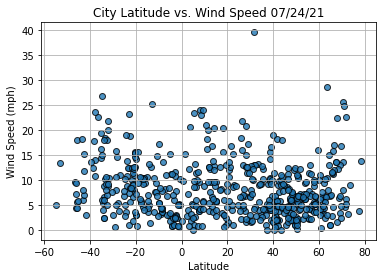

In [70]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()